Step 1: Import Required Libraries

In this step, we import all the essential Python libraries for data analysis and visualization.

Pandas helps in handling and analyzing tabular data.

NumPy is useful for numerical calculations.

Matplotlib and Seaborn are for creating visualizations.

SciPy gives us statistical tools like Z-score for detecting outliers.

We also set up display and style options to make our notebook easier to read.

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.options.display.max_columns = None
sns.set(style="whitegrid", rc={"figure.figsize": (10, 6)})

Step 2: Load the Solar Dataset

In this step, we load our solar dataset into a pandas DataFrame.
A DataFrame is like an Excel sheet inside Python — it lets us view and analyze our data easily.
We’ll use pd.read_csv() to read the CSV file and then use basic commands to inspect the structure, number of rows/columns, and the first few entries to understand what we’re working with.

In [14]:
import pandas as pd
df = pd.read_csv("../data/benin-malanville.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


Step 3: Summary Statistics & Missing-Value Report

Here, we try to understand the data numerically before cleaning.

df.describe() gives summary statistics (mean, min, max, quartiles) for all numeric columns.

df.isna().sum() counts missing values for each column.

Columns with more than 5% missing values are flagged because they may need special attention.

This step helps us spot weird values, missing data, and get a feel for distributions.

In [15]:
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print("\nMissing Values per Column:\n", missing_values)


threshold = 0.05 * len(df)
col_with_missing = missing_values[missing_values > threshold]
print("\nColumns with more than 5% missing values:\n", col_with_missing)

Summary Statistics:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         

tep 4: Outlier Detection & Basic Cleaning

Here we focus on finding and fixing suspicious data points:

Outliers: Values that are way too high or low compared to the rest of the data (e.g., negative solar irradiance, huge wind gusts).

Z-score: Measures how far a value is from the mean in standard deviations. Usually, |Z| > 3 is considered an outlier.

Missing or invalid data can be imputed (filled) using the median, which is robust to outliers.

Columns we’ll focus on:

Solar irradiance: GHI, DNI, DHI

Sensor readings: ModA, ModB

Wind speed: WS, WSgust

In [16]:
from scipy.stats import zscore
import pandas as pd

# Select columns for Z-score calculation
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = df[cols_to_check].apply(zscore)

# Flag rows with |Z| > 3
outliers = (z_scores.abs() > 3).any(axis=1)
print("Number of outlier rows:", outliers.sum())

# View first few outlier rows
print(df[outliers].head())


Number of outlier rows: 7740
            Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
670  2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2  3.2   
671  2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
672  2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4  3.4   
673  2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2  4.7   
674  2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   

     WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
670     4.1      0.7  190.5     18.4  999         0            0.0   63.0   
671     4.1      0.6  175.8     13.3  999         0            0.0   63.7   
672     4.6      0.9  171.5     11.9  999         0            0.0   65.8   
673     5.6      0.6  160.7      8.0  999         0            0.0   65.4   
674     4.6      0.4  169.1     12.3  999         0            0.0   65.0   

     TModB  Comments  
670 

tep 5: Cleaning – Impute Missing and Outlier Values

After identifying outliers and missing values, we clean the data:

Missing values: Replace NaN with the median of the column (median is safer than mean for skewed data).

Outliers: Replace extreme values (|Z|>3) with the median too.

This keeps our dataset realistic and avoids deleting too much data.

Columns we focus on:

GHI, DNI, DHI, ModA, ModB, WS, WSgust

In [21]:
import numpy as np
# Fill missing values with median
df[cols_to_check] = df[cols_to_check].fillna(df[cols_to_check].median())

# Replace outliers with median
for col in cols_to_check:
    median_value = df[col].median()
    z = zscore(df[col])
    df.loc[np.abs(z) > 3, col] = median_value

# Confirm cleaning
print(df[cols_to_check].describe())
print("Remaining missing values:\n", df[cols_to_check].isna().sum())


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.342811     167.187516     110.906983     236.524528   
std       330.868308     261.710501     152.916844     326.815176   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       482.900000     314.200000     210.500000     463.600000   
max      1233.000000     952.300000     591.400000    1215.000000   

                ModB             WS         WSgust  
count  525600.000000  525600.000000  525600.000000  
mean      228.737160       2.082432       2.754888  
std       316.357415       1.521898       1.912898  
min         0.000000       0.000000       0.000000  
25%         0.000000       1.000000       1.300000  
50%         4.300000       1.900000       2.600000  
75%    

Creating the clean benin data

In [23]:

df.to_csv("../data/benin_clean.csv", index=False)


Step 6: Time Series Analysis

Now that the data is clean, we can visualize trends over time:

Plot GHI, DNI, DHI, Tamb against Timestamp.

Helps us see daily or seasonal patterns, anomalies, and overall trends.

Useful for understanding solar irradiance and temperature behavior.

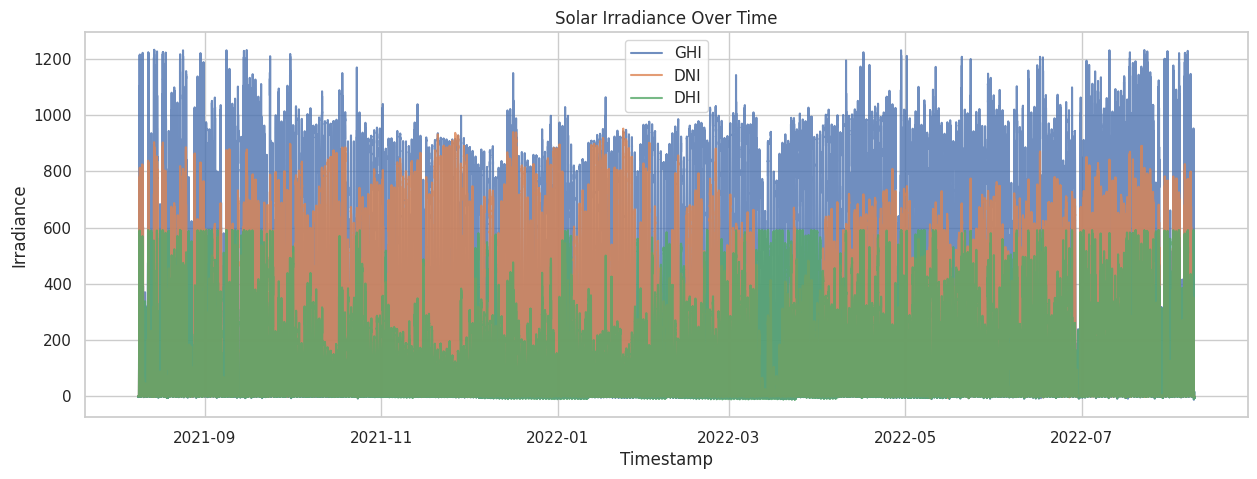

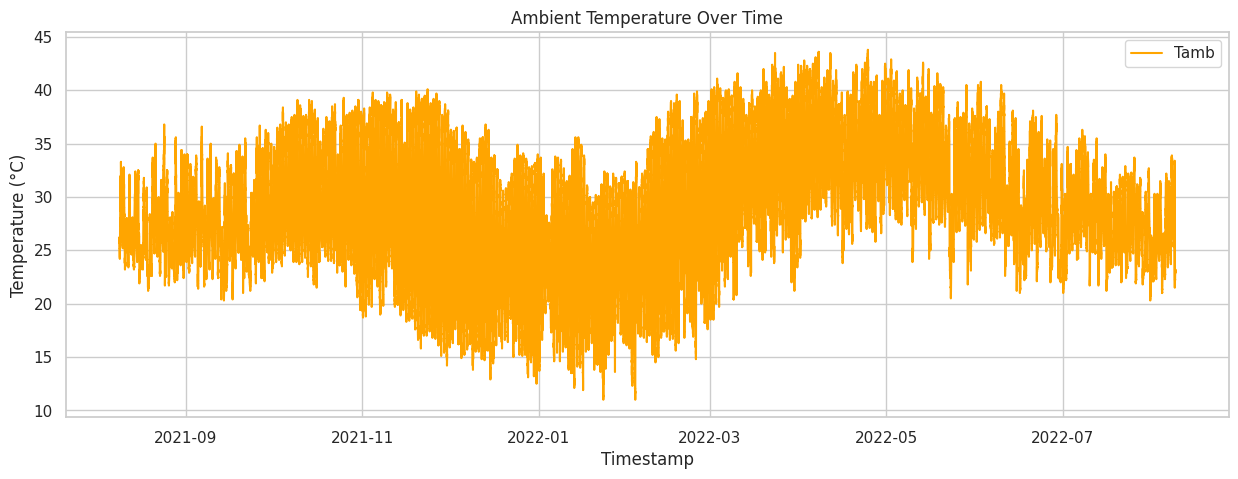

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("../data/benin_clean.csv", parse_dates=["Timestamp"])

# Set Timestamp as index for easier plotting
df.set_index("Timestamp", inplace=True)

# Plot GHI, DNI, DHI over time
plt.figure(figsize=(15,5))
plt.plot(df.index, df["GHI"], label="GHI", alpha=0.8)
plt.plot(df.index, df["DNI"], label="DNI", alpha=0.8)
plt.plot(df.index, df["DHI"], label="DHI", alpha=0.8)
plt.xlabel("Timestamp")
plt.ylabel("Irradiance")
plt.title("Solar Irradiance Over Time")
plt.legend()
plt.show()

# Plot Temperature
plt.figure(figsize=(15,5))
plt.plot(df.index, df["Tamb"], color="orange", label="Tamb")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.title("Ambient Temperature Over Time")
plt.legend()
plt.show()


Step 7: Cleaning Impact Analysis

We’ll analyze how cleaning (the “Cleaning” column) influences the solar module readings (ModA and ModB).

If Cleaning = 1, that means the panels were cleaned.

If Cleaning = 0, they weren’t cleaned yet.

By comparing average readings before and after cleaning, we can see if cleaning improves performance.

                ModA        ModB
Cleaning                        
0         236.459225  228.669520
1         307.229278  301.972165


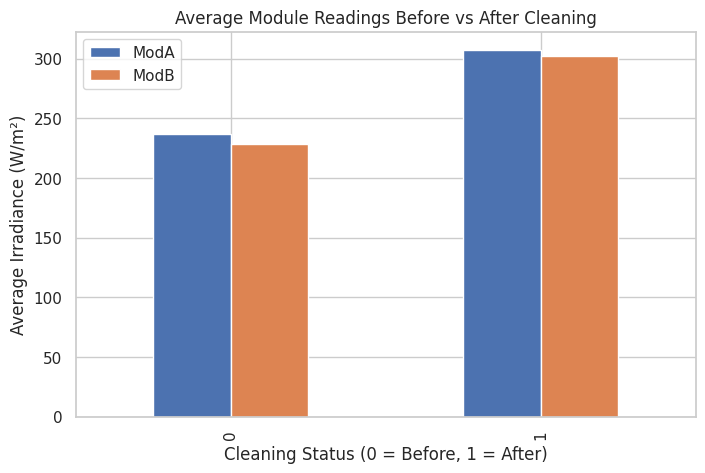

In [35]:
import matplotlib.pyplot as plt

# Group data by Cleaning status and compute average ModA & ModB
cleaning_effect = df.groupby("Cleaning")[["ModA", "ModB"]].mean()

# Display the grouped averages
print(cleaning_effect)

# Plot comparison
cleaning_effect.plot(kind="bar", figsize=(8,5))
plt.title("Average Module Readings Before vs After Cleaning")
plt.ylabel("Average Irradiance (W/m²)")
plt.xlabel("Cleaning Status (0 = Before, 1 = After)")
plt.legend(["ModA", "ModB"])
plt.show()


Step 8: Correlation & Relationship Analysis

Now we’ll explore how different variables relate to each other.
We’ll start with a correlation heatmap, then make scatter plots to visualize relationships.

Goals:

Find which features are strongly related (positively or negatively).

For example, higher GHI (Global Horizontal Irradiance) might relate to higher Tamb (Temperature).

Or strong wind might reduce humidity.

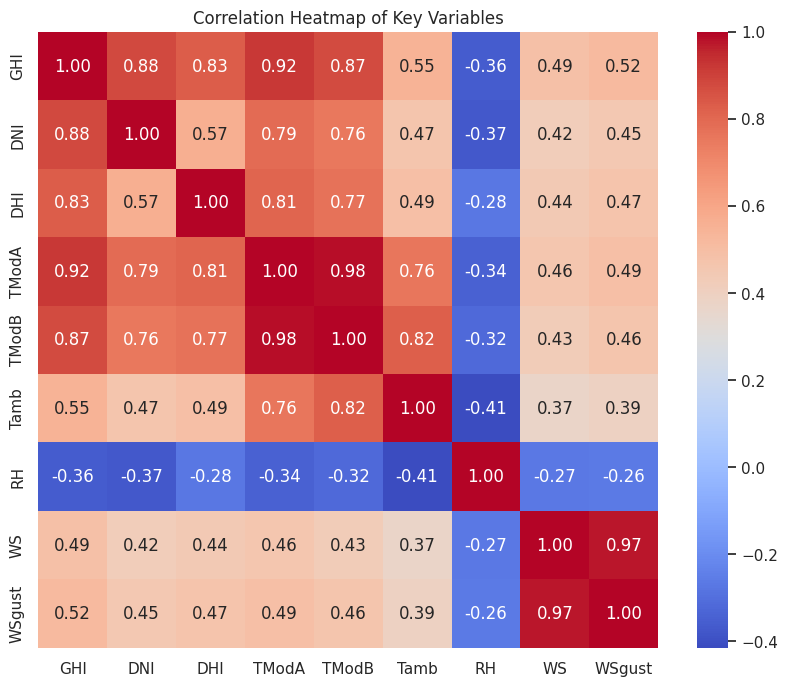

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation
corr_columns = ["GHI", "DNI", "DHI", "TModA", "TModB", "Tamb", "RH", "WS", "WSgust"]

# Compute correlation matrix
corr = df[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Variables")
plt.show()


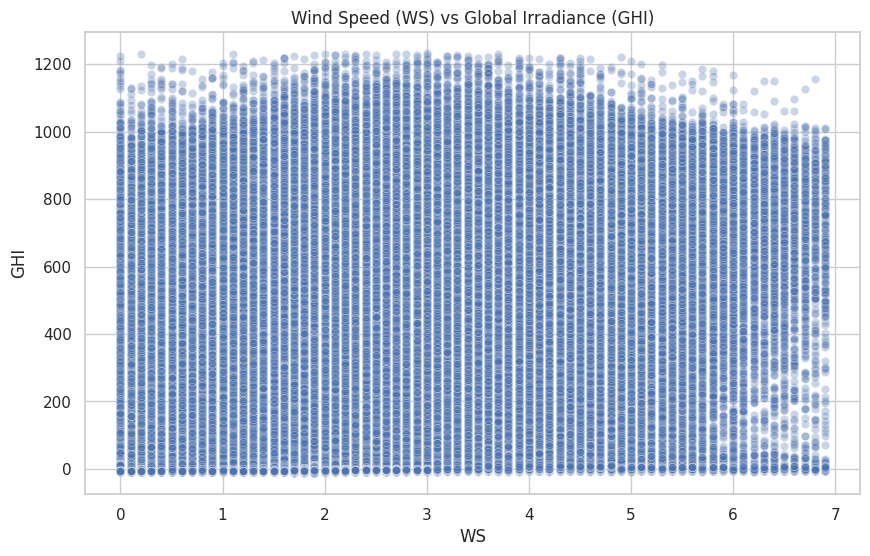

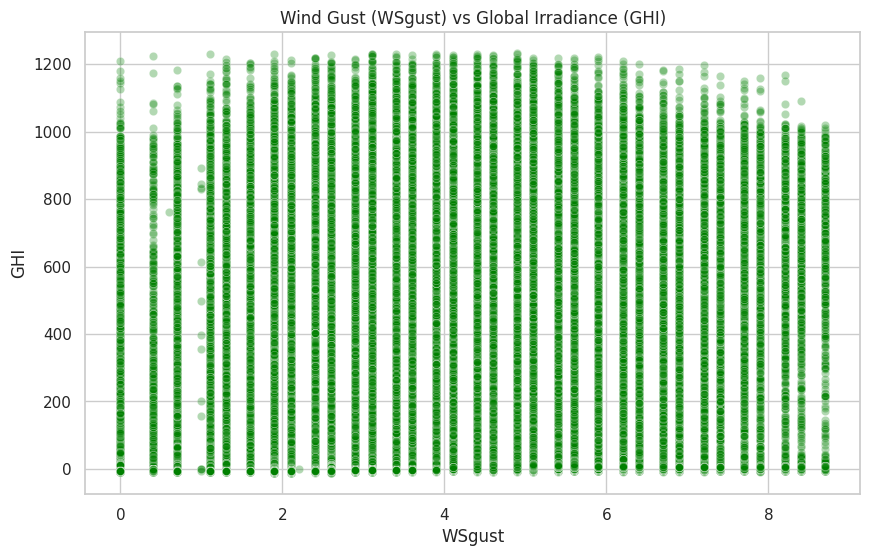

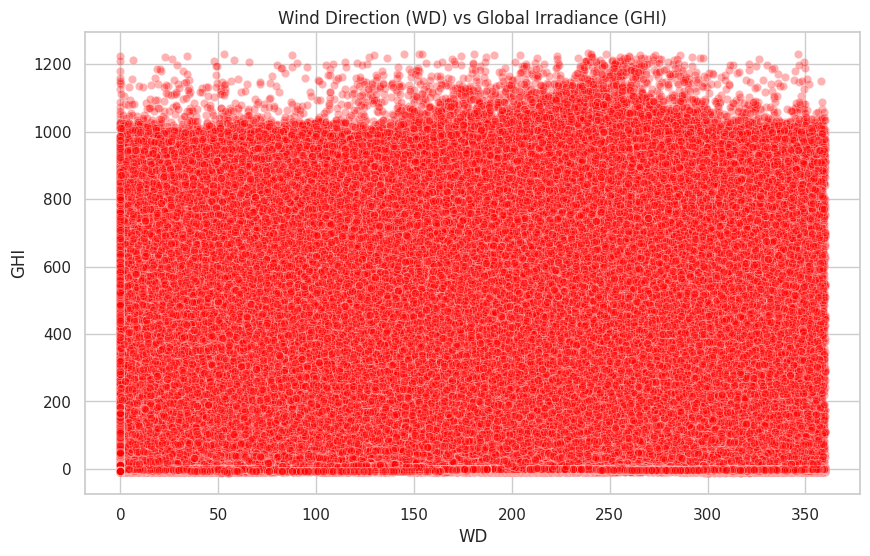

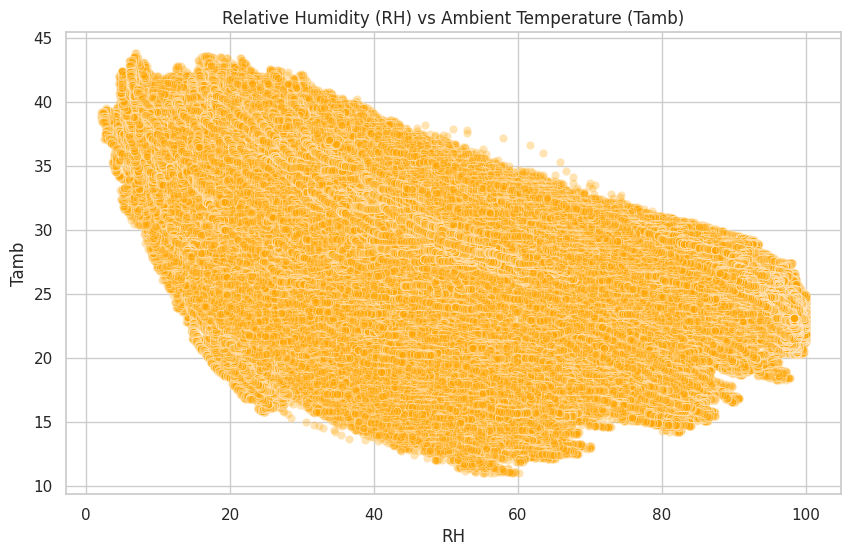

In [38]:
# Scatter: Wind Speed vs GHI
sns.scatterplot(x="WS", y="GHI", data=df, alpha=0.3)
plt.title("Wind Speed (WS) vs Global Irradiance (GHI)")
plt.show()

# Scatter: Wind Gust vs GHI
sns.scatterplot(x="WSgust", y="GHI", data=df, alpha=0.3, color="green")
plt.title("Wind Gust (WSgust) vs Global Irradiance (GHI)")
plt.show()

# Scatter: Wind Direction vs GHI
sns.scatterplot(x="WD", y="GHI", data=df, alpha=0.3, color="red")
plt.title("Wind Direction (WD) vs Global Irradiance (GHI)")
plt.show()

# Scatter: Relative Humidity vs Temperature
sns.scatterplot(x="RH", y="Tamb", data=df, alpha=0.3, color="orange")
plt.title("Relative Humidity (RH) vs Ambient Temperature (Tamb)")
plt.show()


Step 9: Wind & Distribution Analysis

We’ll analyze the wind patterns (speed and direction) and check the distribution of GHI and wind.

Wind rose or radial bar plots show how often wind comes from each direction and how strong it is.

Histograms show the spread of values — are most days calm, or are there extreme spikes?

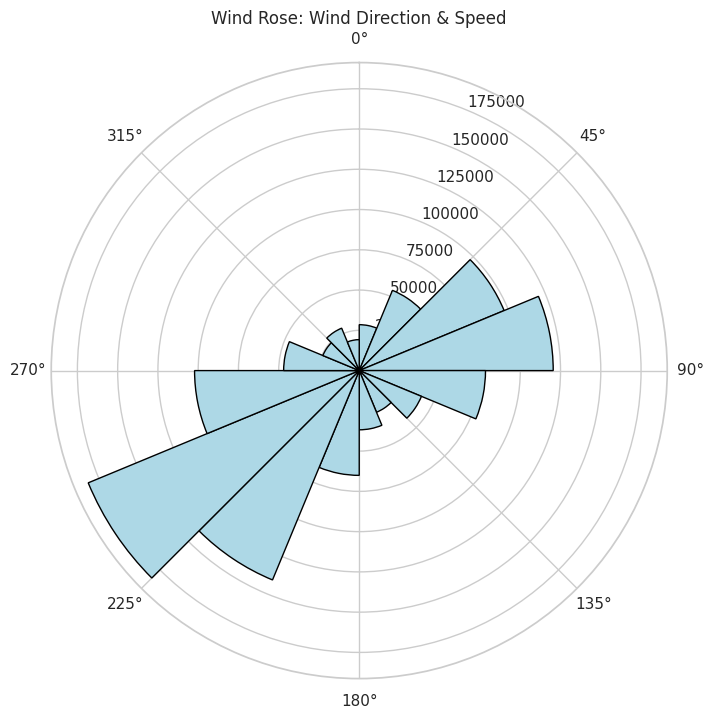

In [39]:
import numpy as np

# Convert wind direction to radians
wind_dir_rad = np.deg2rad(df["WD"].dropna())
wind_speed = df["WS"].dropna()

# Create polar histogram (wind rose)
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
bins = 16  # number of direction bins
ax.hist(wind_dir_rad, bins=bins, weights=wind_speed, edgecolor='black', color='lightblue')
ax.set_theta_zero_location('N')  # 0° = North
ax.set_theta_direction(-1)       # clockwise
plt.title("Wind Rose: Wind Direction & Speed")
plt.show()


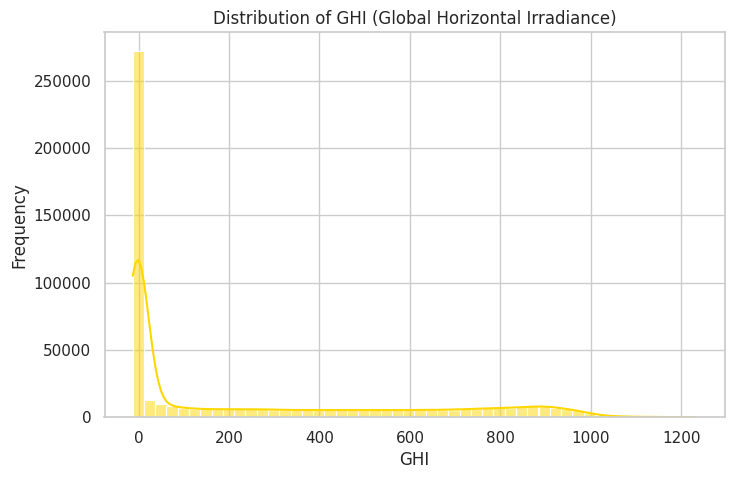

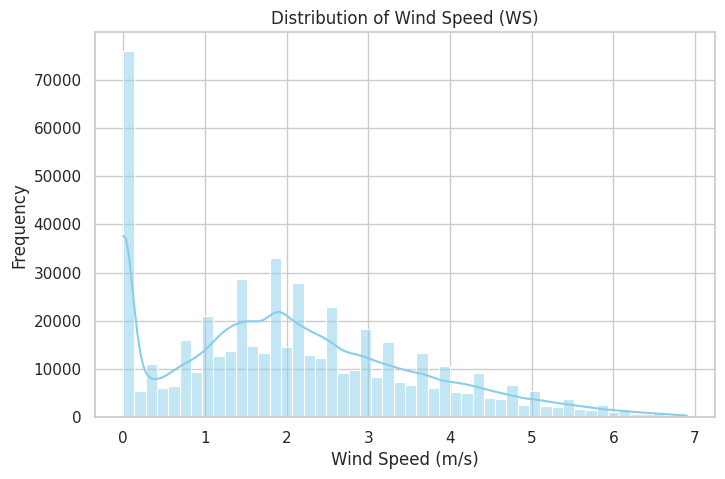

In [40]:
# Histogram for GHI
plt.figure(figsize=(8,5))
sns.histplot(df["GHI"], bins=50, kde=True, color="gold")
plt.title("Distribution of GHI (Global Horizontal Irradiance)")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

# Histogram for Wind Speed (WS)
plt.figure(figsize=(8,5))
sns.histplot(df["WS"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Wind Speed (WS)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()


Step 10: Temperature Analysis & Bubble Chart

Goals:

Explore how relative humidity (RH) affects temperature (Tamb) and solar radiation (GHI).

Use a bubble chart to visualize three variables at once: X-axis, Y-axis, and bubble size.

Example:

X-axis → Ambient Temperature (Tamb)

Y-axis → Global Horizontal Irradiance (GHI)

Bubble size → Relative Humidity (RH)

Color → Optional, could represent pressure or another variable

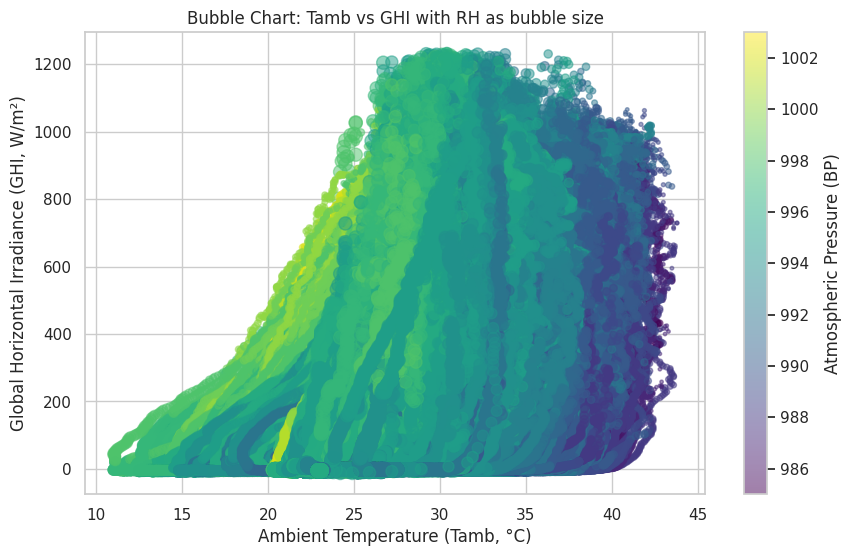

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(df["Tamb"], df["GHI"], 
            s=df["RH"],  # bubble size = RH
            alpha=0.5, 
            c=df["BP"],   # optional: color = atmospheric pressure
            cmap="viridis")
plt.colorbar(label="Atmospheric Pressure (BP)")
plt.xlabel("Ambient Temperature (Tamb, °C)")
plt.ylabel("Global Horizontal Irradiance (GHI, W/m²)")
plt.title("Bubble Chart: Tamb vs GHI with RH as bubble size")
plt.show()
